In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

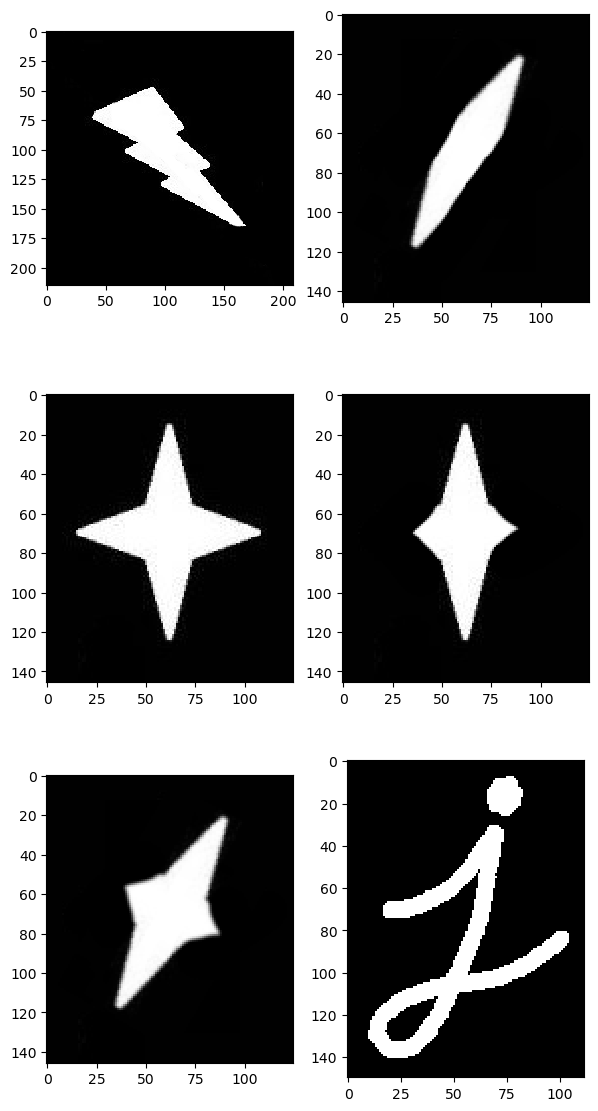

In [15]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

plt.show()

In [16]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [ ]:
# TODO
# Your Answer

# there are 75 different intensity values (computer actual)
# but visually I would expect two because I can only see 0 and 255 valuoe

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


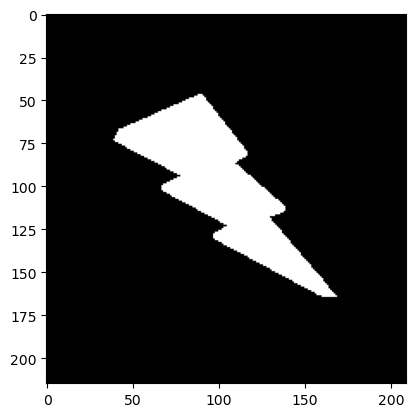

In [30]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [20]:
#it separates the values above 200 as white and below 200 as black which creates only two grayscales, a good value for thresholding would separate the shape from the background and still retain all special and important parts of the shape

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

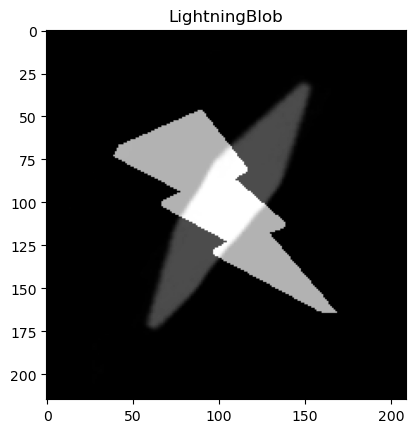

In [31]:
blob_resized = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
blended = cv2.addWeighted(lightningbolt, 0.7, blob_resized, 0.3, 0)
plt.imshow(blended, cmap='gray')
plt.title("LightningBlob")
plt.show()


## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

<function matplotlib.pyplot.show(close=None, block=None)>

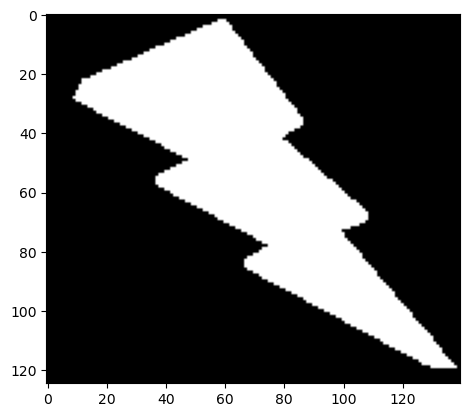

In [40]:
bolt = lightningbolt[45:170, 30:170]
plt.imshow(bolt, cmap='gray')
plt.show

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

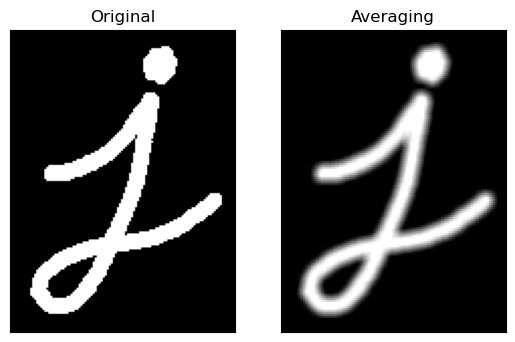

In [46]:
img = cv.imread('shapes/letterj.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

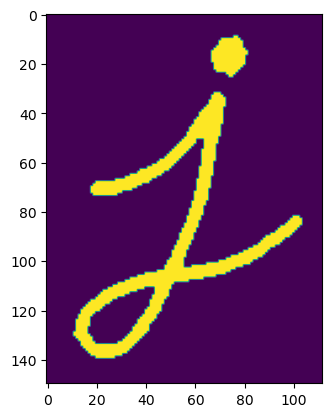

In [60]:
import cv2 as cv
import numpy as np
img = cv.imread('shapes/letterj.png',0)
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(erosion)
plt.show()


## 5. Perform erosion on j with a 5x5 kernel

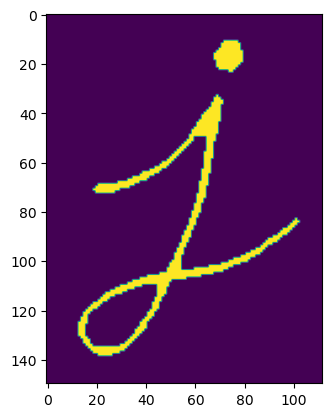

In [61]:
import cv2 as cv
import numpy as np
img = cv.imread('shapes/letterj.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(erosion)
plt.show()

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



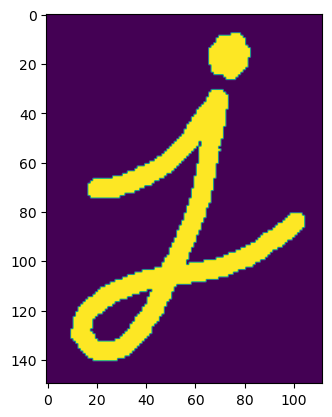

In [62]:
import cv2 as cv
import numpy as np
img = cv.imread('shapes/letterj.png',0)
kernel = np.ones((1,1),np.uint8)
erosion = cv.erode(img,kernel,iterations = 2)
plt.imshow(erosion)
plt.show()

## 7. Perform dilation on j with a 3x3 kernel

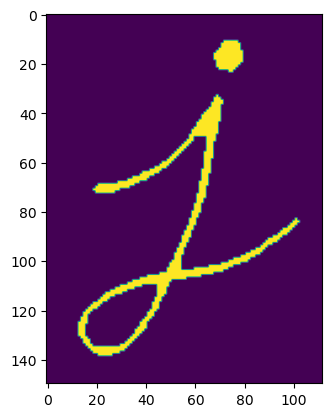

In [63]:
import cv2 as cv
import numpy as np
img = cv.imread('shapes/letterj.png',0)
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img,kernel,iterations = 2)
plt.imshow(erosion)
plt.show()

## 8. Perform dilation on j with a 5x5 kernel

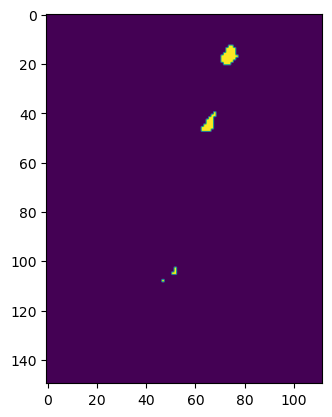

In [64]:
import cv2 as cv
import numpy as np
img = cv.imread('shapes/letterj.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 2)
plt.imshow(erosion)
plt.show()

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# It erodes the edges by a specific kernal size

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# Repeated iterations makes the effect stronger, for two iterations it doubles the erosion effect

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

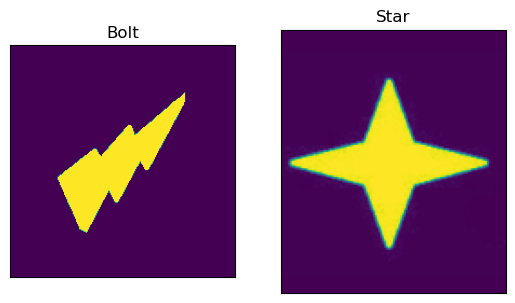

In [75]:
bolt_rows, bolt_cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((bolt_cols / 2, bolt_rows / 2), 90, 1)
bolt_dst = cv2.warpAffine(lightningbolt, M, (bolt_cols, bolt_rows))

star_rows, star_cols = star.shape[:2]
M = cv2.getRotationMatrix2D((star_cols / 2, star_rows / 2), 90, 1)
star_dst = cv2.warpAffine(star, M, (star_cols, star_rows))

plt.subplot(121),plt.imshow(bolt_dst),plt.title('Bolt')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(star_dst),plt.title('Star')
plt.xticks([]), plt.yticks([])
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 